# Description
This Notebook is to practice preparing & cleaning data sets for exploratory data analysis.

# Data Set: human-microbiome-project
Data set from (https://www.kaggle.com/bbhatt001/human-microbiome-project)

In [18]:
import pandas as pd

df = pd.read_csv('datasets/human-microbiome-project/project_catalog.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 17 columns):
HMP ID                     2915 non-null int64
GOLD ID                    1783 non-null object
Organism Name              2915 non-null object
Domain                     2712 non-null object
NCBI Superkingdom          2751 non-null object
HMP Isolation Body Site    2915 non-null object
Project Status             2915 non-null object
Current Finishing Level    1579 non-null object
NCBI Submission Status     2915 non-null object
NCBI Project ID            2915 non-null int64
Genbank ID                 1579 non-null object
Gene Count                 2915 non-null int64
IMG/HMP ID                 2915 non-null int64
HOMD ID                    397 non-null object
Sequencing Center          2911 non-null object
Funding Source             2915 non-null object
Strain Repository ID       1377 non-null object
dtypes: int64(4), object(13)
memory usage: 387.2+ KB


In [7]:
df.head()

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242"
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100"
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974"
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517


In [20]:
df.describe()

,HMP ID,NCBI Project ID,Gene Count,IMG/HMP ID
count,2915.000000,2915.000000,2915.000000,2.915000e+03
mean,3193.047684,152890.012007,1474.622642,2.250715e+08
std,3055.524395,104857.664414,1653.762393,5.295180e+08
min,1.000000,0.000000,0.000000,0.000000e+00
25%,1262.500000,49365.000000,0.000000,0.000000e+00
50%,2122.000000,169465.000000,1517.000000,0.000000e+00
75%,3096.500000,269820.500000,2489.500000,0.000000e+00
max,9999.000000,311149.000000,8490.000000,2.524023e+09


In [88]:
# See categoricals
categoricals = ['Domain', 'NCBI Superkingdom', 'HMP Isolation Body Site', 'Current Finishing Level', 'Sequencing Center', 'Funding Source']
for col in categoricals:
    print('"' + col + '": ' + str(pd.Categorical(df[col]).categories.values))

"Domain": ['ARCHAEAL' 'BACTERIAL' 'EUKARYAL' 'VIRUS']
"NCBI Superkingdom": ['Archaea' 'Bacteria' 'Error!!!' 'Eukaryota' 'Viruses']
"HMP Isolation Body Site": ['airways' 'blood' 'bone' 'ear' 'eye' 'gastrointestinal_tract' 'heart'
 'liver' 'lymph_nodes' 'nose' 'oral' 'other' 'skin' 'unknown'
 'urogenital_tract' 'wound']
"Current Finishing Level": ['Level 1: Standard Draft' 'Level 2: High-Quality Draft'
 'Level 3: Improved-High-Quality Draft' 'Level 5: Non-contiguous Finished'
 'Level 6: Finished']
"Sequencing Center": ['Baylor College of Medicine' 'Broad Institute' 'J. Craig Venter Institute'
 'NIH Intramural Sequencing Center (NISC)' 'Sanger Institute'
 'Univ of Tokyo' 'Virginia Commonwealth Univ' 'Wakayama Medical Univ'
 'Washington University Genome Sequencing Center']
"Funding Source": ['IHMC-DARPA' 'IHMC-JST' 'IHMC-MetaHIT' 'NIH-HMP' 'NIH-HMP Demo Projects'
 'NIH-HMP Jumpstart Supplement' 'NIH-HMP NHGRI' 'NIH-HMP Sequencing Center'
 'NIH-NHGRI' 'NIH-NIAID']


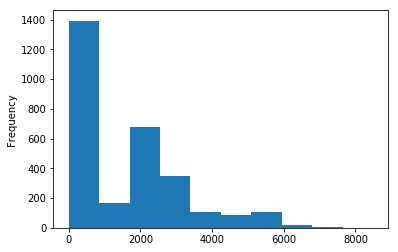

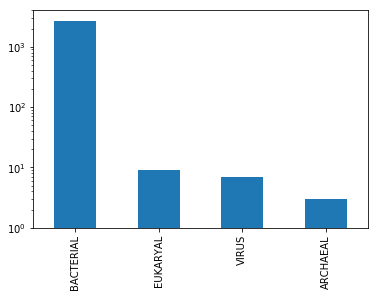

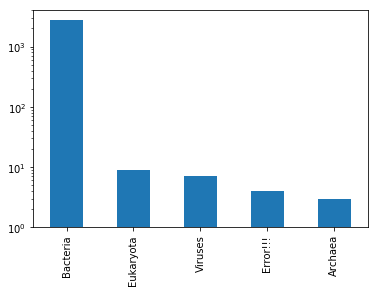

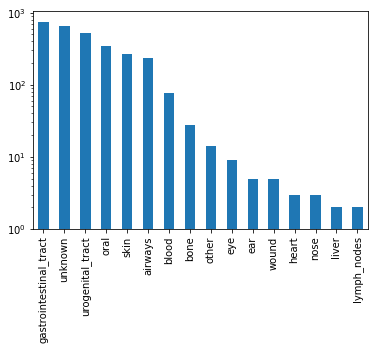

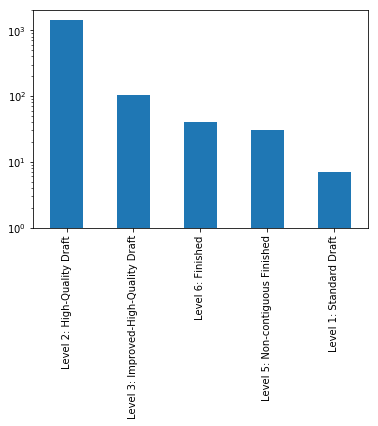

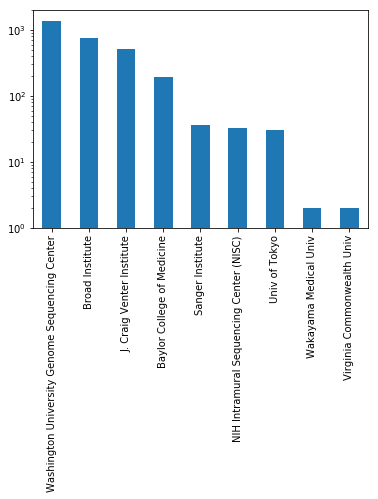

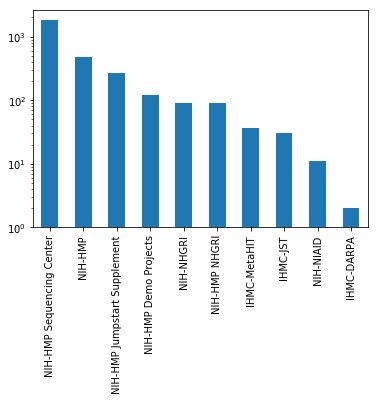

In [89]:
import matplotlib.pyplot as plt

# Plot numerics as histograms:
df['Gene Count'].plot('hist')
plt.show()

# Plot categoricals as bars:
for col in categoricals:
    df[col].value_counts().plot(kind='bar', log=True)
    plt.show()

## Data Set: predict-mortality-death-rate
From https://www.kaggle.com/rajanand/mortality

In [13]:
df2 = pd.read_csv('datasets/predict-mortality-death-rate/Mortality_05_UT.csv', low_memory=False)
df2.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 122 columns):
id                                  53503 non-null int64
m_id                                52980 non-null float64
client_m_id                         14430 non-null float64
hl_id                               32607 non-null float64
house_no                            53503 non-null int64
house_hold_no                       53503 non-null int64
state                               53503 non-null int64
district                            53503 non-null int64
rural                               53503 non-null int64
stratum_code                        53503 non-null int64
psu_id                              53503 non-null int64
m_serial_no                         53490 non-null float64
deceased_sex                        53503 non-null int64
date_of_death                       53365 non-null float64
month_of_death                      53469 non-null float64
year_of_death          

In [11]:
df2.head()

,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,...,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,165767,10.0,NaN,NaN,132,1,5,9,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
1,167609,4.0,NaN,NaN,111,1,5,2,1,1,...,1.0,2.0,5.022170e+13,NaN,NaN,2.46,NaN,4,3,NaN
2,530767,954.0,NaN,25345.0,19,1,5,1,2,0,...,NaN,NaN,NaN,2.534505e+11,0.847674,6.00,NaN,4,1,NaN
3,530775,962.0,NaN,25535.0,72,6,5,1,2,0,...,NaN,NaN,NaN,2.553505e+11,2.690161,6.00,NaN,4,1,NaN
4,167601,26.0,NaN,NaN,248,2,5,2,1,1,...,1.0,2.0,5.022160e+13,NaN,NaN,2.46,NaN,4,3,NaN


In [12]:
df2.columns

Index(['id', 'm_id', 'client_m_id', 'hl_id', 'house_no', 'house_hold_no',
       'state', 'district', 'rural', 'stratum_code',
       ...
       'householdstatus', 'isheadchanged', 'fidh', 'fidx', 'as', 'wt', 'x',
       'schedule_id', 'year', 'v126'],
      dtype='object', length=122)